In [1]:
library(GEOquery)
library(matrixStats)
library(genefilter)
library(limma)
library(edgeR)
# library(lumi)
# library(statmod)
# library(org.Hs.eg.db)
# library(org.Mm.eg.db)
# library(preprocessCore)
# library(rgl)
# library(mogene10sttranscriptcluster.db)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie

In [2]:
RLE_normalization  <- function(original_dataset){
        library(edgeR)
        #First, we need to get library sizes vector
        lib.size = apply(original_dataset, 2, sum)
        
        #Now we should obtain normalization factors for each samples using RLE technique
        edger.rle = lib.size * calcNormFactors(original_dataset, method="RLE")
        
        #Finally we should divide expression values on normalization factors
        RLE_dataset <- sweep(original_dataset, 2, edger.rle, "/")*10^7
        
        return(RLE_dataset)
}

In [3]:
df <- read.csv('../../Clocks/data/GSE132040/GSE132040_data_entrez.csv')

In [5]:
rownames(df) <- df$gene
df <- df[,-1]

In [7]:
#RNA seq fast block
# df <- read.csv('Data/GSE103979/GSE103979_data.csv', )
# labels <- df[, 2:3]
# df <- df[, 4:length(df)]

#A) Remove unexpressed genes (for RNA-seq)
reads_thresh <- 10
percentage_thresh <- 0.5
r <- apply(df, 1, function(x){sum(x>=reads_thresh)})>=ncol(df)*percentage_thresh
df_filtered <- df[r,]
#labels_filtered <- labels[r,]

#C) Perform sample normalzation 
rle_df <- log2(RLE_normalization(df_filtered) + 1)
#rle_df <- log2(df_filtered + 1)
#norm_df <- cbind(labels_filtered, rle_df)

#write.csv(norm_df, 'Data/GSE103979/GSE103979_data_norm.csv')

In [8]:
write.csv(rle_df, '../../Clocks/data/GSE132040/GSE132040_data_RLE.csv')

In [17]:
rle_df

,A10_384Bulk_Plate1_S10.gencode.vM19,A10_384Bulk_Plate2_S10.gencode.vM19,A10_384Bulk_Plate3_S10.gencode.vM19,A11_384Bulk_Plate1_S11.gencode.vM19,A11_384Bulk_Plate2_S11.gencode.vM19,A11_384Bulk_Plate3_S11.gencode.vM19,A12_384Bulk_Plate1_S12.gencode.vM19,A12_384Bulk_Plate2_S12.gencode.vM19,A12_384Bulk_Plate3_S12.gencode.vM19,A13_384Bulk_Plate1_S13.gencode.vM19,⋯,P6_384Bulk_Plate3_S366.gencode.vM19,P7_384Bulk_Plate1_S367.gencode.vM19,P7_384Bulk_Plate2_S367.gencode.vM19,P7_384Bulk_Plate3_S367.gencode.vM19,P8_384Bulk_Plate1_S368.gencode.vM19,P8_384Bulk_Plate2_S368.gencode.vM19,P8_384Bulk_Plate3_S368.gencode.vM19,P9_384Bulk_Plate1_S369.gencode.vM19,P9_384Bulk_Plate2_S369.gencode.vM19,P9_384Bulk_Plate3_S369.gencode.vM19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik,5.432633,7.134481,4.969949,7.848792,0.8622332,6.577852,6.394135,7.343499,5.129623,3.700818,⋯,4.019094,2.1530611,9.345061,7.258576,5.802325,5.829306,0.8501972,2.1150936,5.208368,0.5886098
0610009L18Rik,2.823393,4.442565,2.688337,7.353463,2.2266088,2.649841,6.270162,3.329274,4.061441,3.233027,⋯,3.079181,0.0000000,4.453461,4.058319,2.490161,2.711751,2.3258862,2.5845469,3.535922,1.4663866
0610010F05Rik,7.616322,8.212405,6.256668,8.157032,4.1510410,5.388495,7.407768,7.952106,6.442196,4.667150,⋯,5.590718,2.7709205,10.073124,6.481676,7.667369,8.087283,1.9794426,2.7365416,6.428155,1.1759987
0610010K14Rik,3.901516,5.897304,3.507511,4.450623,2.0947091,2.839015,3.136056,4.073763,3.736893,4.364962,⋯,4.602021,1.2064870,5.067180,4.963543,4.189196,4.774419,0.3420796,1.2221074,4.789622,0.0000000
0610012G03Rik,6.680079,7.989141,5.752243,9.447841,3.7736458,7.889353,8.687204,8.033268,6.116661,6.289501,⋯,6.208695,3.5187871,11.021365,8.380316,7.243746,7.652406,2.8388300,3.2725713,6.813133,2.4683677
0610030E20Rik,2.193911,5.527284,3.507511,4.773847,3.2611435,4.216191,4.500939,6.776269,4.526652,4.548829,⋯,3.933738,1.4138157,5.654458,4.678558,3.439969,3.374008,1.3815573,1.5846300,5.532516,0.0000000
0610037L13Rik,7.236598,8.113216,6.944147,7.935482,5.0398470,6.423836,7.370516,7.195456,7.581922,7.046985,⋯,7.078143,3.7274083,9.058050,7.509450,7.693354,7.816824,3.0399676,3.8408383,7.714852,2.3306662
0610040B10Rik,3.313043,4.093968,2.952761,2.923965,0.4945949,2.027740,3.136056,3.216733,2.723724,2.433293,⋯,3.025184,0.5612484,5.163843,1.694723,2.640203,3.512028,0.0000000,0.9997506,3.453726,0.0000000
0610040J01Rik,4.556140,4.778680,5.958827,7.689063,1.3981863,8.093564,7.429665,9.138715,6.332739,3.350867,⋯,3.873892,3.5484088,1.455454,8.549221,5.234171,5.239415,1.3815573,0.9997506,4.451324,0.0000000


In [32]:
write.csv(rle_df, 'data/GSE127927/GSE127927_rle.csv')

In [29]:
rle_df

,GSM3656666,GSM3656667,GSM3656668,GSM3656669,GSM3656670,GSM3656671,GSM3656672,GSM3656673,GSM3656674,GSM3656675,⋯,GSM3656724,GSM3656725,GSM3656726,GSM3656727,GSM3656728,GSM3656729,GSM3656730,GSM3656731,GSM3656732,GSM3753566
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,10.736592,10.341973,10.287884,10.664959,10.850717,10.903364,9.782512,9.932243,10.030792,10.176157,⋯,9.859146,9.842494,9.980203,9.950323,9.947864,11.650997,11.025987,10.244435,9.988117,10.881749
ENSMUSG00000000028,8.292611,8.568250,8.622740,9.038784,8.897867,8.068959,8.650801,7.467931,8.266884,8.424228,⋯,9.697578,9.424594,9.429922,9.547049,9.553861,6.808211,7.336828,9.611869,9.447825,8.138213
ENSMUSG00000000031,16.649977,16.461997,15.657442,16.445861,16.242160,15.453865,15.335583,14.724239,14.871480,15.505299,⋯,8.715725,5.478782,9.750555,10.973583,4.165806,15.065179,15.298345,7.219677,5.546229,15.371106
ENSMUSG00000000037,4.646353,2.727362,3.792739,4.525186,5.182559,4.717388,3.595586,3.309382,4.546323,4.884739,⋯,4.750327,4.458760,7.966482,4.665243,3.839639,3.753898,2.590297,5.533272,5.357988,5.954896
ENSMUSG00000000056,7.403464,5.580557,6.068916,6.385382,7.382276,7.803112,6.805898,7.097290,7.424527,7.505983,⋯,7.336924,7.176913,6.984216,6.790253,7.054822,8.609980,8.823369,6.836386,6.738052,8.368779
ENSMUSG00000000058,6.396207,4.767551,2.224648,3.347306,3.117285,7.505939,5.443164,5.578801,5.232603,3.688501,⋯,1.844578,0.000000,0.000000,3.721010,0.000000,8.890138,7.381400,0.000000,0.000000,8.679134
ENSMUSG00000000078,10.588500,9.508129,9.422475,8.621302,7.545322,10.912864,8.900305,9.282418,8.755051,8.548576,⋯,7.609998,8.833891,7.978507,8.835362,8.151195,12.136711,11.784064,8.396836,7.878715,10.927674
ENSMUSG00000000085,8.158966,8.051234,9.014557,8.450154,8.260053,8.233963,8.212854,8.330392,8.511562,8.696522,⋯,7.772706,8.062902,8.137108,7.578277,7.463850,8.181092,8.461708,7.384905,8.090180,8.496165
ENSMUSG00000000088,10.363830,10.784857,10.257723,10.169351,9.973011,11.078563,11.594622,11.935147,11.220269,10.265178,⋯,11.696037,11.340798,11.492535,11.481035,11.461461,9.620352,10.265549,11.584025,11.811110,9.849490


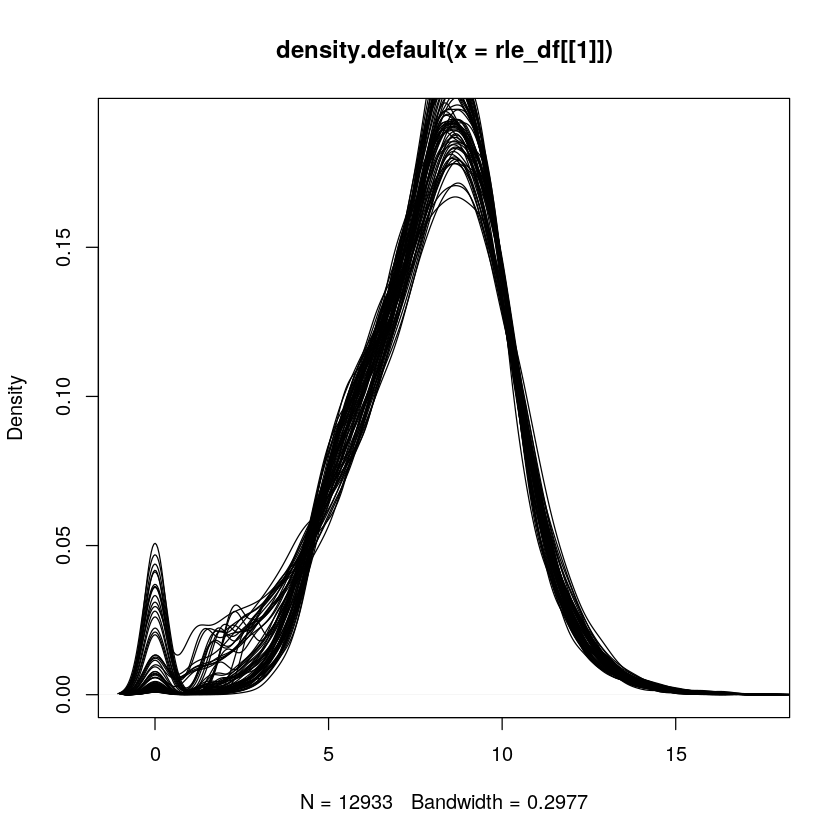

In [28]:
#rle_df
plot(density(rle_df[[1]]))
for (i in 2:length(rle_df)){
    lines(density(rle_df[[i]]))
}